# Sprint 10: Linear Regression SciKit-Learn

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Sample Data


I will analyze sale-prices of housing in Catalonia during the year 2020. First I will create a simplified dataset with average price of new  housing sales, average price of second-hand housing sales, intensity of construction and completed housing.
- https://www.idescat.cat/pub/?id=aec&n=728&t=2020
- https://www.idescat.cat/pub/?id=aec&n=729&t=2020
- https://www.idescat.cat/pub/?id=aec&n=727
- https://www.idescat.cat/pub/?id=aec&n=718

In [210]:
dfPriceNewCons = pd.read_csv("preu_venda_primera.csv")
dfPriceNewCons.head(5)

,Unnamed: 0,2016,2017,2018,2019,2020,Unnamed: 6
0,Alt Camp,"1.089,05","1.285,96","821,89","1.155,58","819,27",NaN
1,Alt Empordà,"1.635,69","1.710,45","1.812,31","1.982,50","1.823,48",NaN
2,Alt Penedès,"1.215,81","1.224,31","1.258,99","1.379,19","1.557,13",NaN
3,Alt Urgell,"925,24","1.489,35","948,73","1.154,79","1.202,06",NaN
4,Alta Ribagorça,..,..,"0,00","0,00","0,00",NaN


In [181]:
dfPriceSecHand = pd.read_csv("preu_venda_segona.csv")
dfPriceSecHand.head(5)

,Unnamed: 0,2016,2017,2018,2019,2020,Unnamed: 6
0,Alt Camp,"1.079,10","1.058,25","1.045,53","1.077,21","1.154,45",NaN
1,Alt Empordà,"1.785,13","1.876,15","1.862,31","1.923,79","2.062,06",NaN
2,Alt Penedès,"1.052,44","1.188,03","1.206,97","1.312,48","1.323,84",NaN
3,Alt Urgell,"950,78","794,38","997,67","955,98","996,69",NaN
4,Alta Ribagorça,"1.092,83","1.128,11","1.124,58","1.451,41","982,53",NaN


In [182]:
dfConInt = pd.read_csv("intensitat.csv")
dfConInt.head(5)

,Unnamed: 0,2016,2017,2018,2019,2020,Unnamed: 6
0,Alt Camp,"0,2","0,4","0,2","0,3","0,3",NaN
1,Alt Empordà,"2,0","1,7","2,3","2,4","1,7",NaN
2,Alt Penedès,"1,0","0,5","3,1","1,5","3,1",NaN
3,Alt Urgell,"0,2","0,4","0,2","1,5","0,4",NaN
4,Alta Ribagorça,"0,3","1,6","1,1","0,5","2,4",NaN


In [183]:
dfComHous = pd.read_csv("housing_completed.csv")
dfComHous.head(5)

,Unnamed: 0,aïllats,adossats,Plurifamiliars\nen bloc,Altres,Sense\ndades,Total,Habitatges amb\nprotecció oficial (1)
0,Alt Camp,8,4,6.0,0,0,18.0,0.0
1,Alt Empordà,86,45,129.0,0,0,260.0,10.0
2,Alt Penedès,20,30,126.0,0,0,176.0,1.0
3,Alt Urgell,1,11,4.0,0,0,16.0,0.0
4,Alta Ribagorça,5,0,0.0,0,0,5.0,0.0


In [211]:
#extracting columns I need
firstDf = dfPriceNewCons[['Unnamed: 0','2020']]
secondDf = dfPriceSecHand['2020']
thirdDf = dfConInt['2020']
forthDf = dfComHous['Total']

In [212]:
#puting all together and renaming columns
df = pd.concat([firstDf,secondDf,thirdDf,forthDf], axis=1)
df.columns.values[0] = 'Region'
df.columns.values[1] = 'NewConst'
df.columns.values[2] = 'SecHandConst'
df.columns.values[3] = 'IntensityConst'
df.columns.values[4] = 'TotalConstHousing'
df.head(5)

,Region,NewConst,SecHandConst,IntensityConst,TotalConstHousing
0,Alt Camp,"819,27","1.154,45","0,3",18.0
1,Alt Empordà,"1.823,48","2.062,06","1,7",260.0
2,Alt Penedès,"1.557,13","1.323,84","3,1",176.0
3,Alt Urgell,"1.202,06","996,69","0,4",16.0
4,Alta Ribagorça,"0,00","982,53","2,4",5.0


In [186]:
#type of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             54 non-null     object 
 1   NewConst           54 non-null     object 
 2   SecHandConst       54 non-null     object 
 3   IntensityConst     54 non-null     object 
 4   TotalConstHousing  54 non-null     float64
dtypes: float64(1), object(4)
memory usage: 2.2+ KB


In [213]:
#I need to change all objects to floats - deleting point
def replace1(s):
    i=str(s).find('.')#returns a string version of object
    if(i>0):
        return s[:i] + '' + s[i+1:]#take first part and the second part after point
    else :
        return s 

df['NewConst']=df['NewConst'].apply(replace1)
df['SecHandConst']=df['SecHandConst'].apply(replace1)
df['IntensityConst']=df['IntensityConst'].apply(replace1)

In [214]:
#I need to change all objects to floats - replacing comma
def replace2(s):
    i=str(s).find(',')
    if(i>0):
        return s[:i] + '.'+ s[i+1:]
    else :
        return s 

df['NewConst']=df['NewConst'].apply(replace2)
df['SecHandConst']=df['SecHandConst'].apply(replace2)
df['IntensityConst']=df['IntensityConst'].apply(replace2)

In [215]:
#changing all to float
df['NewConst'] = pd.to_numeric(df['NewConst'],errors = 'coerce')
df['SecHandConst'] = pd.to_numeric(df['SecHandConst'],errors = 'coerce')
df['IntensityConst'] = pd.to_numeric(df['IntensityConst'],errors = 'coerce')
df.head()

,Region,NewConst,SecHandConst,IntensityConst,TotalConstHousing
0,Alt Camp,819.27,1154.45,0.3,18.0
1,Alt Empordà,1823.48,2062.06,1.7,260.0
2,Alt Penedès,1557.13,1323.84,3.1,176.0
3,Alt Urgell,1202.06,996.69,0.4,16.0
4,Alta Ribagorça,0.00,982.53,2.4,5.0


In [190]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             54 non-null     object 
 1   NewConst           54 non-null     float64
 2   SecHandConst       54 non-null     float64
 3   IntensityConst     54 non-null     float64
 4   TotalConstHousing  54 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.2+ KB


**Which is the relationship between prices of housing (new and second-hand properties) and the total number of constructed housing in each reagion of Catalonia for year 2020?**

###Multiple predictions

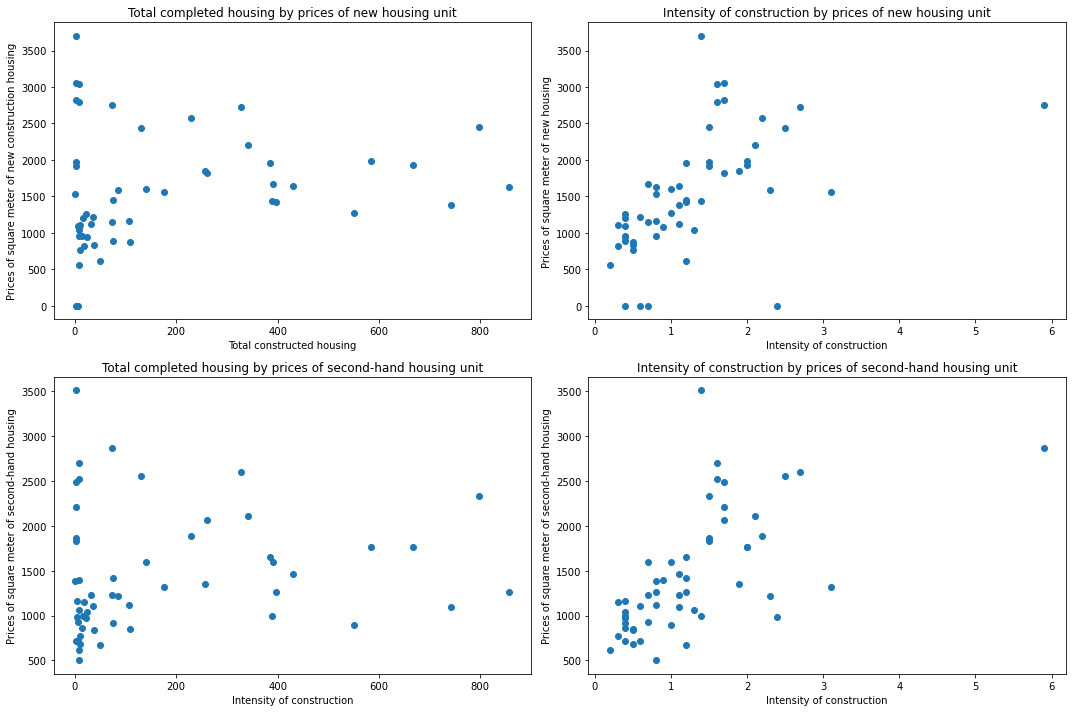

In [191]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

axes[0,0].plot(df['TotalConstHousing'],df['NewConst'],'o')
axes[0,0].set_xlabel("Total constructed housing")
axes[0,0].set_ylabel("Prices of square meter of new construction housing")
axes[0,0].set_title("Total completed housing by prices of new housing unit")

axes[0,1].plot(df['IntensityConst'],df['NewConst'],'o')
axes[0,1].set_xlabel("Intensity of construction")
axes[0,1].set_ylabel("Prices of square meter of new housing")
axes[0,1].set_title("Intensity of construction by prices of new housing unit")

axes[1,0].plot(df['TotalConstHousing'],df['SecHandConst'],'o')
axes[1,0].set_xlabel("Intensity of construction")
axes[1,0].set_ylabel("Prices of square meter of second-hand housing")
axes[1,0].set_title("Total completed housing by prices of second-hand housing unit")

axes[1,1].plot(df['IntensityConst'],df['SecHandConst'],'o')
axes[1,1].set_xlabel("Intensity of construction")
axes[1,1].set_ylabel("Prices of square meter of second-hand housing")
axes[1,1].set_title("Intensity of construction by prices of second-hand housing unit")

plt.tight_layout();

Interpretation:
- New construction housing is likely to have higher price of square meter.
- The amount of new construction and second-hand properties is almoust equally distributed.
- The regions with higher intensity of construction tend to have increasing price of square meter of new housing
- Second-hand properties are little less influenced by intensity of construction than new housing units.

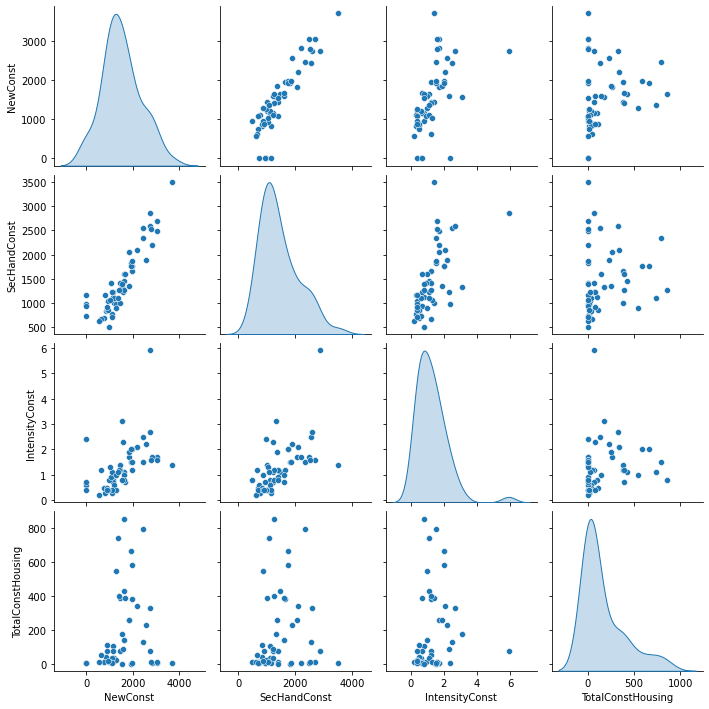

In [192]:
#Relationships between features
sns.pairplot(df,diag_kind='kde')
plt.show()

Interpretation:
- New housing prices are almoust normally distributed.
- There might be strong positive correlation between new housing and second-hand housing.

## SciKit Learn preparation

In [201]:
#Do I have complete values dataset?
df.isnull().values.any()

False

In [216]:
df_test = df.copy()

In [217]:
df_test.head()

,Region,NewConst,SecHandConst,IntensityConst,TotalConstHousing
0,Alt Camp,819.27,1154.45,0.3,18.0
1,Alt Empordà,1823.48,2062.06,1.7,260.0
2,Alt Penedès,1557.13,1323.84,3.1,176.0
3,Alt Urgell,1202.06,996.69,0.4,16.0
4,Alta Ribagorça,0.00,982.53,2.4,5.0


In [219]:
df_test.drop('Region',axis=1, inplace=True)
df_test.head()

,NewConst,SecHandConst,IntensityConst,TotalConstHousing
0,819.27,1154.45,0.3,18.0
1,1823.48,2062.06,1.7,260.0
2,1557.13,1323.84,3.1,176.0
3,1202.06,996.69,0.4,16.0
4,0.00,982.53,2.4,5.0


### Scaling data

I need to scale the values in dataset because there are prices in euros, intensity as a coeficient and total housing as numerical value. Data is not normaly distributed so I will use Normalization.

In [220]:
from sklearn import preprocessing
names = df_test.columns

d = preprocessing.normalize(df_test, axis=0)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df.head()

,NewConst,SecHandConst,IntensityConst,TotalConstHousing
0,0.064750,0.098728,0.025814,0.008636
1,0.144116,0.176346,0.146280,0.124743
2,0.123065,0.113214,0.266746,0.084441
3,0.095003,0.085236,0.034419,0.007676
4,0.000000,0.084025,0.206513,0.002399


OK, now let's create test and learn model with these values.

## SciKit Learn use

In [221]:
X = scaled_df.drop('NewConst',axis=1)
y = scaled_df['NewConst']

### Train & test and validation Split

In [120]:
from sklearn.model_selection import train_test_split

In [222]:
#Train 70%, test 30%, test_size is the percentage and random_state is for initilizing random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [223]:
X_train.head()

,SecHandConst,IntensityConst,TotalConstHousing
24,0.058650,0.043024,0.005278
45,0.078000,0.034419,0.036463
33,0.072814,0.043024,0.051816
50,0.215594,0.137675,0.004082
15,0.245620,0.507678,0.035024


In [224]:
y_train.count()

37

In [225]:
X_test.head()

,SecHandConst,IntensityConst,TotalConstHousing
19,0.103805,0.197909,0.040781
49,0.151164,0.172094,0.320494
48,0.160896,0.189304,0.110350
12,0.120916,0.103257,0.035984
44,0.107527,0.068838,0.411172


In [226]:
y_test.count()

17

## Model creation

### Import a model class from a model family

In [126]:
from sklearn.linear_model import LinearRegression

In [227]:
#instantiate the model
model = LinearRegression()

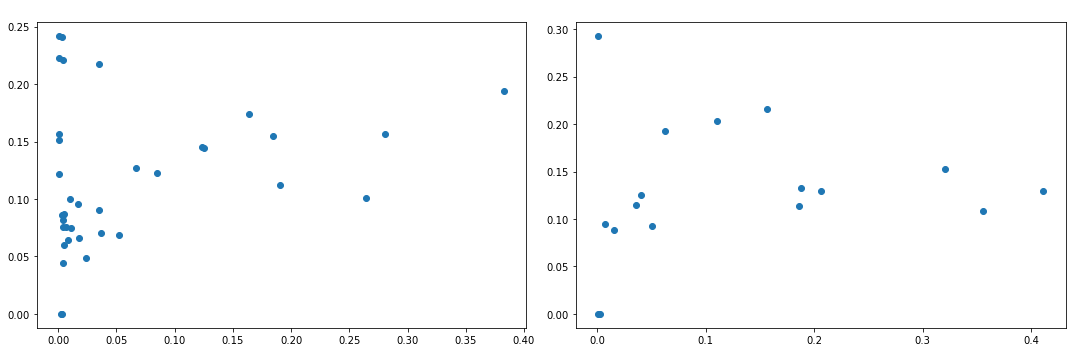

In [264]:
#display the training set
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))

axes[0].plot(X_train['TotalConstHousing'],y_train,'o')
axes[0].set_title(" ")

axes[1].plot(X_test['TotalConstHousing'],y_test,'o')
axes[1].set_title(" ")

plt.tight_layout();

Looks like my training sample is quite similar to original dataset so the random selection worked well.

In [260]:
#fit the dataset - linear regression
model.fit(X_train,y_train)

LinearRegression()

**Predict the price of new construction unit when secon-hand is 1200 eur by square meter, intensity of construction 2 and 25 estimated total finished buildings.**

In [274]:
predictedPrice = model.predict([[1200, 2, 25 ]])
print('The price of square meter of new unit will be', round(predictedPrice[0]),'euros.')

The price of square meter of new unit will be 1191 euros.


In [275]:
print(model.coef_)

[0.99130652 0.00816537 0.04218679]


Interpretation:
- If the second-hand housing price increase 1 eur the new housing price increase by x*0.991
- If the intensity of construction increase by 1 unit the new housing price increase by x*0.008
- If the total finished housing increase 1 unit the new housing price increase by x*0.042

### Calculation of prediction error

In [229]:
# X_test
test_predictions = model.predict(X_test)

In [230]:
test_predictions

array([0.10020761, 0.15874408, 0.15966678, 0.11619511, 0.11846875,
       0.09188027, 0.22300973, 0.10255972, 0.07906872, 0.09993554,
       0.29248337, 0.12716071, 0.05515731, 0.21508644, 0.08732365,
       0.07905087, 0.13799789])

In [231]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [232]:
print(MAE, MSE, RMSE)

0.01872560491626308 0.000802983937815483 0.028336971218100974


The mean absolute error is 0.018. This is a metric used to evaluate a regression model. The error is the difference between the predicted values and the actual values.
Notes:
- The first time I created the model with values without scaling them, the MAE was around 237. That made me think that something went wrong.
- RMSE - How similar, on average, are the numbers in test list to prediction list. My RMSE is close to 0, that means that the prediction model is very good.

In [277]:
scaled_df.corr()

,NewConst,SecHandConst,IntensityConst,TotalConstHousing
NewConst,1.000000,0.900784,0.544947,0.227807
SecHandConst,0.900784,1.000000,0.615254,0.127462
IntensityConst,0.544947,0.615254,1.000000,0.154121
TotalConstHousing,0.227807,0.127462,0.154121,1.000000


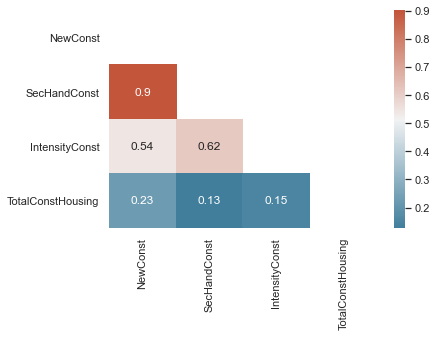

In [284]:
#Correlation matrix
corr = scaled_df.corr()
sns.set_theme(style="white")
cmap = sns.diverging_palette(230, 20, as_cmap=True)

matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix, cmap=cmap)
plt.show()

Interpretation:
- New housing units and second-hand properties prices are strongly correlated.
- Intensity of construction and second-hand propetries has also significative correlation.